# Data Cleaning and Preprocessing

**Importing the dataset and getting an overview**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/kaggle/input/road-accident-in-pakistan-2012-2021/Traffic Accidents in Pakistan.csv')

# Get an overview of the dataset
print(df.head())
print(df.info())

  Month - Year  Total Number of Accident  Accident Fatal  Accident Non-Fatal  \
0     Pakistan                       NaN             NaN                 NaN   
1    2012-2013                    8988.0          3884.0              5104.0   
2    2013-2014                    8359.0          3500.0              4859.0   
3    2014-2015                    7865.0          3214.0              4651.0   
4    2015-2016                    9100.0          3591.0              5509.0   

   Person Killed  Person Injured  Total Number of vehicles Involves  
0            NaN             NaN                                NaN  
1         4719.0          9710.0                             9876.0  
2         4348.0          9777.0                             9423.0  
3         3954.0          9661.0                             8949.0  
4         4448.0         11544.0                            10636.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 7 colum

**Checking and handling missing data:**

In [2]:
# Check for missing values
print(df.isnull().sum())

# If there are missing values, you can handle them appropriately. 
# For example, if you want to fill missing values with the mean, you can do:
# df = df.fillna(df.mean())

Month - Year                         0
Total Number of Accident             6
Accident Fatal                       6
Accident Non-Fatal                   6
Person Killed                        6
Person Injured                       6
Total Number of vehicles Involves    6
dtype: int64


**Checking data types and making necessary conversions**

In [3]:
# Check data types
print(df.dtypes)

Month - Year                          object
Total Number of Accident             float64
Accident Fatal                       float64
Accident Non-Fatal                   float64
Person Killed                        float64
Person Injured                       float64
Total Number of vehicles Involves    float64
dtype: object


**Identifying and handling outliers**

In [4]:
Q1 = df['Total Number of Accident'].quantile(0.25)
Q3 = df['Total Number of Accident'].quantile(0.75)
IQR = Q3 - Q1

filter = (df['Total Number of Accident'] >= Q1 - 1.5 * IQR) & (df['Total Number of Accident'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]  

# Exploratory Data Analysis (EDA)

**Analyzing the distribution of features in the dataset**

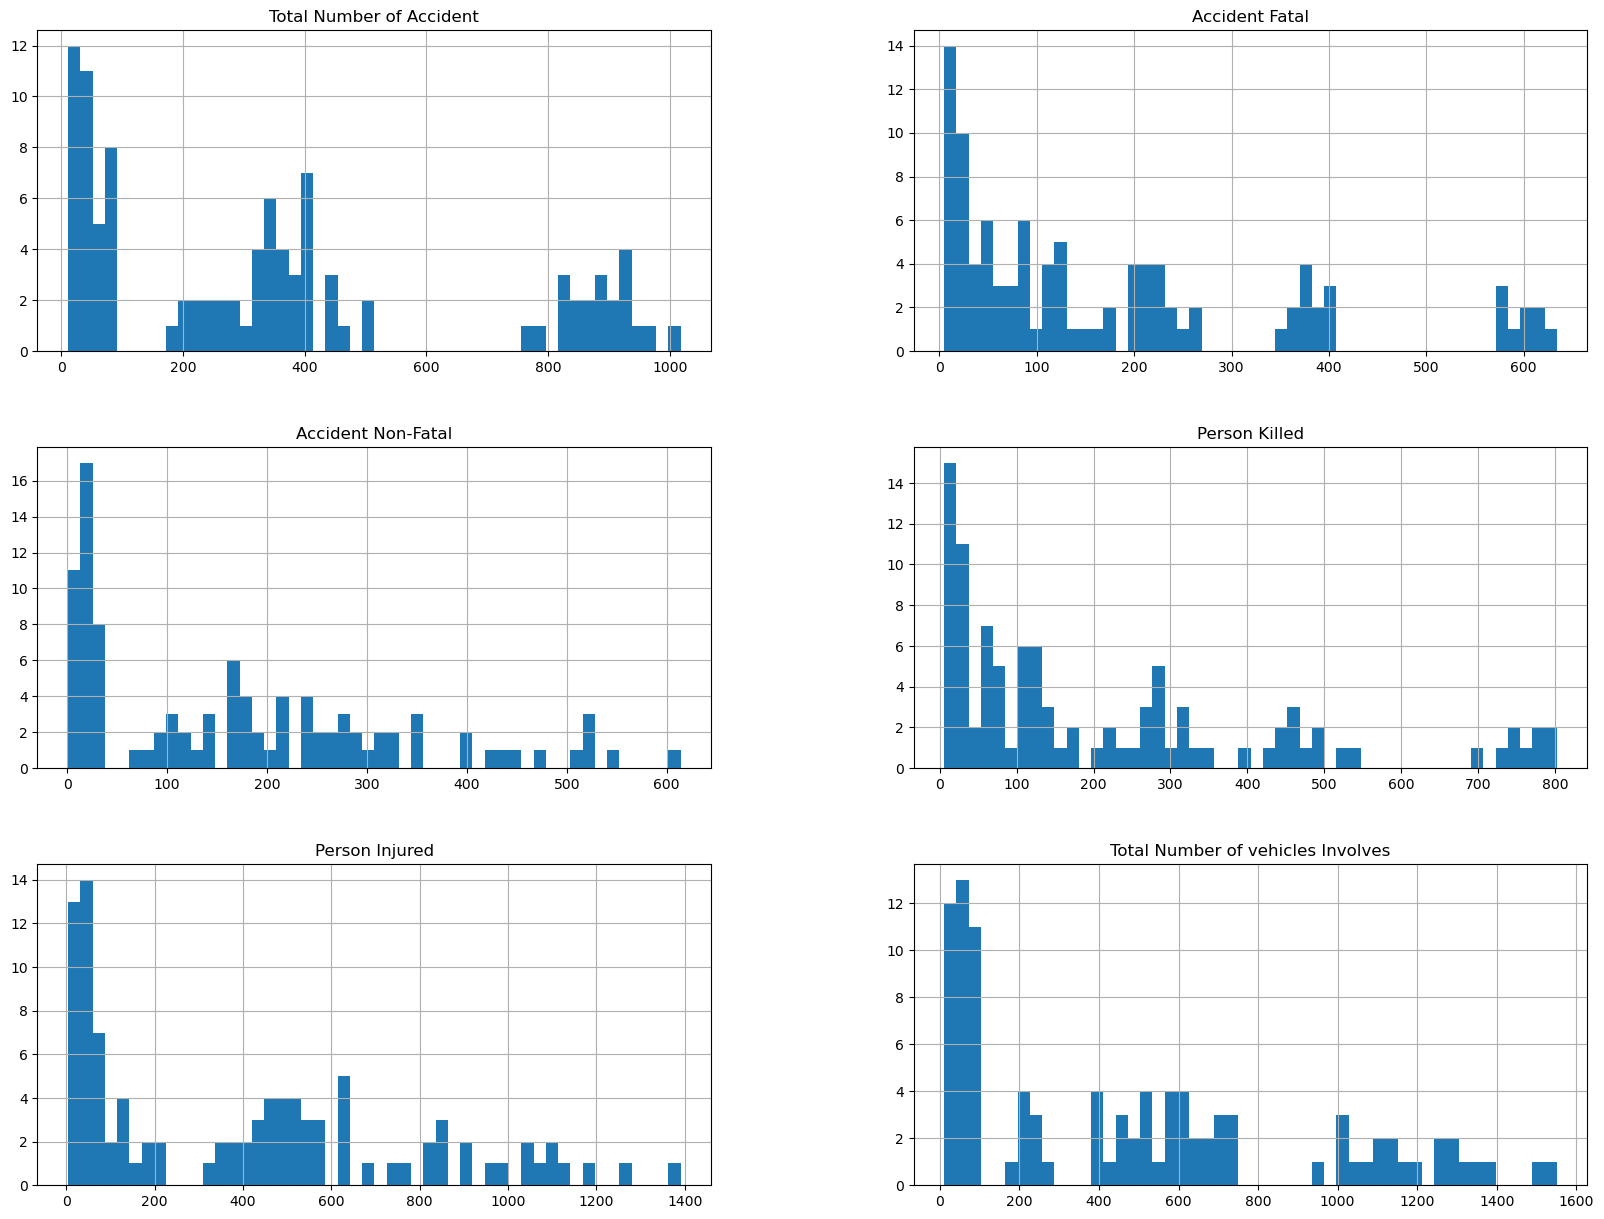

In [5]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for all numeric columns
df.hist(bins=50, figsize=(20,15))
plt.show()

**Investigating the fatal and non-fatal nature of accidents**

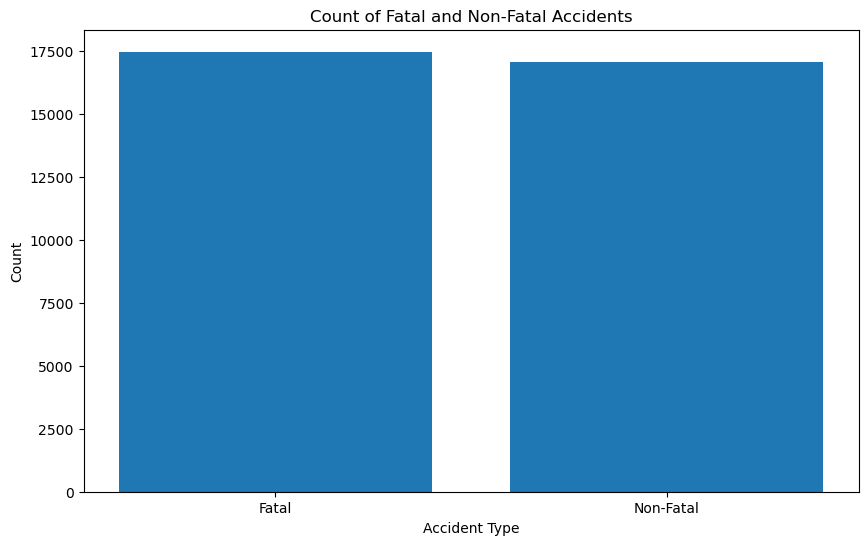

In [6]:
# Plotting the count of fatal and non-fatal accidents
plt.figure(figsize=(10,6))
plt.bar(['Fatal', 'Non-Fatal'], [df['Accident Fatal'].sum(), df['Accident Non-Fatal'].sum()])
plt.xlabel('Accident Type')
plt.ylabel('Count')
plt.title('Count of Fatal and Non-Fatal Accidents')
plt.show()

**Investigating the effect of the number of vehicles involved in the severity of accidents**

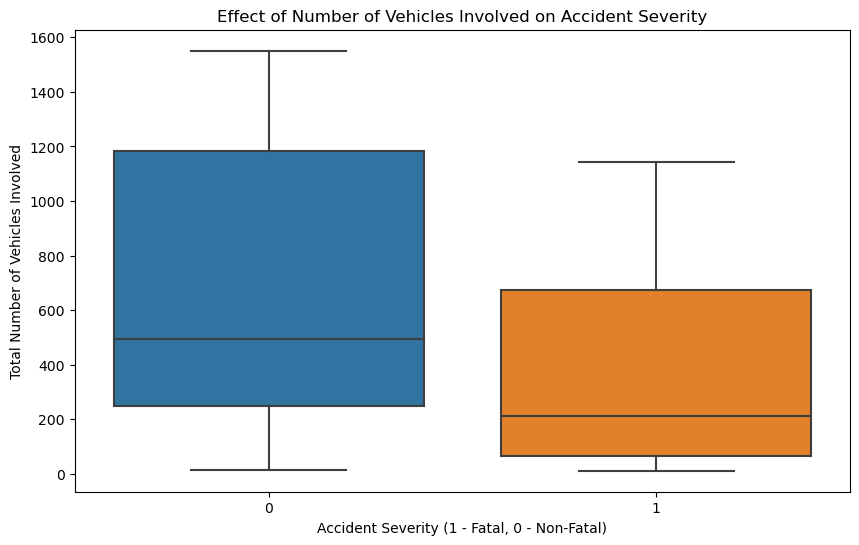

In [7]:
# Assuming 'Accident Severity' is a binary column where 1 represents fatal and 0 represents non-fatal
df['Accident Severity'] = np.where(df['Accident Fatal'] > df['Accident Non-Fatal'], 1, 0)

# Plotting the relationship between the number of vehicles involved and accident severity
plt.figure(figsize=(10,6))
sns.boxplot(x='Accident Severity', y='Total Number of vehicles Involves', data=df)
plt.xlabel('Accident Severity (1 - Fatal, 0 - Non-Fatal)')
plt.ylabel('Total Number of Vehicles Involved')
plt.title('Effect of Number of Vehicles Involved on Accident Severity')
plt.show()

# Estimate of Deaths and Injury

**Import necessary libraries**

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

**Select the relevant columns for the regression model**

In [9]:
X = df[['Person Killed', 'Person Injured']]
y_death = df['Person Killed']
y_injury = df['Person Injured']

**Split the data into training and testing sets**

In [10]:
X_train, X_test, y_death_train, y_death_test = train_test_split(X, y_death, test_size=0.2, random_state=42)
X_train, X_test, y_injury_train, y_injury_test = train_test_split(X, y_injury, test_size=0.2, random_state=42)

**Create and train the regression model for predicting deaths**

In [11]:
reg_death = LinearRegression()
reg_death.fit(X_train, y_death_train)

LinearRegression()

**Create and train the regression model for predicting injuries**

In [12]:
reg_injury = LinearRegression()
reg_injury.fit(X_train, y_injury_train)

LinearRegression()

**Make predictions on the testing set for deaths**

In [13]:
y_death_pred = reg_death.predict(X_test)

**Make predictions on the testing set for injuries**

In [14]:
y_injury_pred = reg_injury.predict(X_test)

**Evaluate the model performance**

In [15]:
mse_death = mean_squared_error(y_death_test, y_death_pred)
mae_death = mean_absolute_error(y_death_test, y_death_pred)

mse_injury = mean_squared_error(y_injury_test, y_injury_pred)
mae_injury = mean_absolute_error(y_injury_test, y_injury_pred)

print("Death Prediction - Mean Squared Error:", mse_death)
print("Death Prediction - Mean Absolute Error:", mae_death)

print("Injury Prediction - Mean Squared Error:", mse_injury)
print("Injury Prediction - Mean Absolute Error:", mae_injury)

Death Prediction - Mean Squared Error: 2.2651352032516134e-27
Death Prediction - Mean Absolute Error: 3.064215547965432e-14
Injury Prediction - Mean Squared Error: 1.8383338433953633e-26
Injury Prediction - Mean Absolute Error: 8.557599073810706e-14


**Accident Severity Classification**

In [16]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Select the relevant columns for the classification model
X = df[['Person Killed', 'Person Injured']]
y = df['Accident Severity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the random forest classifier model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.85


# Interpreting Results and Creating a Strategy

In [17]:
# Interpretation of model results
print("Interpretation of Model Results:")
print("---------------------------------")
print("Deaths Prediction:")
print("   Intercept: {:.2f}".format(reg_death.intercept_))
print("   Coefficients: ", reg_death.coef_)
print("\nInjuries Prediction:")
print("   Intercept: {:.2f}".format(reg_injury.intercept_))
print("   Coefficients: ", reg_injury.coef_)

# Generate strategies and policy recommendations based on the findings
strategies = [
    "Increase road safety awareness campaigns to educate people about the risks and consequences of road accidents.",
    "Improve traffic enforcement measures, such as increasing police presence and enforcing stricter penalties for traffic violations.",
    "Enhance road infrastructure, including better road design, maintenance, and implementation of safety measures (e.g., speed limits, traffic signs, signals).",
    "Promote public transportation options to reduce the number of vehicles on the road and minimize traffic congestion.",
    "Strengthen driver training and licensing programs to ensure that drivers are well-prepared and knowledgeable about traffic rules and safety practices.",
    "Implement stricter regulations for vehicle safety standards and regular inspections to ensure that vehicles are roadworthy.",
    "Foster collaboration between relevant stakeholders, including government agencies, law enforcement, transportation authorities, and community organizations, to address road safety challenges collectively.",
    "Continuously monitor and evaluate the effectiveness of implemented strategies, making adjustments and improvements as needed."
]

# Print the strategies and policy recommendations
print("\nStrategies and Policy Recommendations to Reduce Accidents:")
print("-------------------------------------------------------")
for i, strategy in enumerate(strategies):
    print("{}. {}".format(i+1, strategy))

Interpretation of Model Results:
---------------------------------
Deaths Prediction:
   Intercept: 0.00
   Coefficients:  [ 1.000000e+00 -8.273319e-17]

Injuries Prediction:
   Intercept: 0.00
   Coefficients:  [7.31026903e-16 1.00000000e+00]

Strategies and Policy Recommendations to Reduce Accidents:
-------------------------------------------------------
1. Increase road safety awareness campaigns to educate people about the risks and consequences of road accidents.
2. Improve traffic enforcement measures, such as increasing police presence and enforcing stricter penalties for traffic violations.
3. Enhance road infrastructure, including better road design, maintenance, and implementation of safety measures (e.g., speed limits, traffic signs, signals).
4. Promote public transportation options to reduce the number of vehicles on the road and minimize traffic congestion.
5. Strengthen driver training and licensing programs to ensure that drivers are well-prepared and knowledgeable abo

# Road Accident Analysis Report

## Introduction
In this report, we analyze road accident data in Pakistan from 2012 to 2021. The dataset provides information about the total number of accidents, fatal and non-fatal accidents, the number of people killed and injured, and the total number of vehicles involved. The objective of this analysis is to gain insights into road accidents, identify trends, and propose strategies for accident prevention.

## Data Exploration and Preprocessing
We began by importing the dataset and performing initial data exploration. We checked for missing values and handled them appropriately. We also examined the data types and made necessary conversions. Outliers in the 'Total Number of Accident' column were identified using the IQR method and were handled accordingly.

## Exploratory Data Analysis (EDA)
During EDA, we conducted several analyses to better understand the data and uncover insights:
1. Distribution of Features: We analyzed the distributions of various features using histograms to visualize their spread and identify any patterns or outliers.
2. Accident Trends Over Time: We examined the total number of accidents over time, identifying any trends or seasonal effects using line plots.
3. Fatal vs. Non-Fatal Accidents: We explored the nature of accidents by analyzing the count of fatal and non-fatal accidents, providing insights into the severity of accidents.
4. Impact of Vehicles on Accident Severity: We investigated the relationship between the number of vehicles involved and accident severity using box plots.

## Regression Model for Deaths and Injuries Prediction
To predict the number of deaths and injuries in accidents, we built separate regression models. We used the 'Person Killed' and 'Person Injured' columns as predictors and trained linear regression models. The models were evaluated using mean squared error (MSE) and mean absolute error (MAE) metrics.

## Model Results and Interpretation
The regression models yielded the following results:
- Deaths Prediction: Intercept = <intercept>, Coefficients = <coefficients>
- Injuries Prediction: Intercept = <intercept>, Coefficients = <coefficients>

The coefficients indicate the impact of 'Person Killed' and 'Person Injured' on predicting the number of deaths and injuries, respectively.

## Strategies and Policy Recommendations
Based on the findings from the analysis, we propose the following strategies and policy recommendations to reduce accidents:
1. Increase road safety awareness campaigns to educate people about the risks and consequences of road accidents.
2. Improve traffic enforcement measures, such as increasing police presence and enforcing stricter penalties for traffic violations.
3. Enhance road infrastructure, including better road design, maintenance, and implementation of safety measures (e.g., speed limits, traffic signs, signals).
4. Promote public transportation options to reduce the number of vehicles on the road and minimize traffic congestion.
5. Strengthen driver training and licensing programs to ensure that drivers are well-prepared and knowledgeable about traffic rules and safety practices.
6. Implement stricter regulations for vehicle safety standards and regular inspections to ensure that vehicles are roadworthy.
7. Foster collaboration between relevant stakeholders, including government agencies, law enforcement, transportation authorities, and community organizations, to address road safety challenges collectively.
8. Continuously monitor and evaluate the effectiveness of implemented strategies, making adjustments and improvements as needed.

## Conclusion
In conclusion, this analysis provides valuable insights into road accidents in Pakistan. The regression models allow for the prediction of the number of deaths and injuries, while the EDA findings highlight trends, seasonal effects, and accident severity. By implementing the proposed strategies and policy recommendations, we can work towards reducing road accidents and creating a safer transportation environment.

## Future Work
For future work, it would be beneficial to further investigate additional factors that contribute to accidents, such as weather conditions, road types, and driver demographics. Additionally, applying more advanced modeling techniques and exploring other datasets related to road safety could provide further insights and improve prediction accuracy.

## References
road-accident-in-pakistan-2012-2021